https://www.dps.texas.gov/crimereports/16/citCh6.pdf
https://oag.ca.gov/hatecrimes
https://www.crimemapping.com/map/agency/26

In [1]:
import pandas as pd
import numpy as np
import requests
import bs4
import json
import re
import matplotlib.pyplot as plt

In [2]:
offender2004 = pd.read_excel('2004/Table5.xls')
colsoff = ['Bias Motivation', 'Total Offenses', 'White', 'Black', 'American Indian Alaskan Native',
        'Asian/Pacific Islander', 'Multiple Races, Group','Unknown Race', 'Unknown Offender']

In [3]:
offender2004 = offender2004.drop([0, 1, 2, 32])

In [4]:
offender2004.columns = colsoff

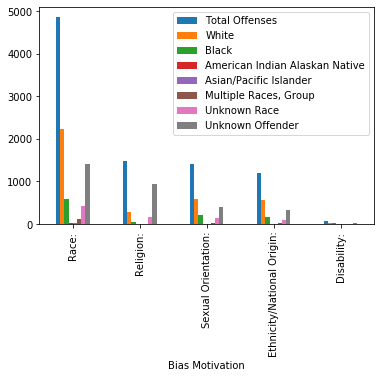

In [5]:
offender2004 = offender2004.reset_index(drop=True)
hold2004 = offender2004['Bias Motivation'][28][:-1]
offender2004['Bias Motivation'][28] = hold2004
offender2004.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


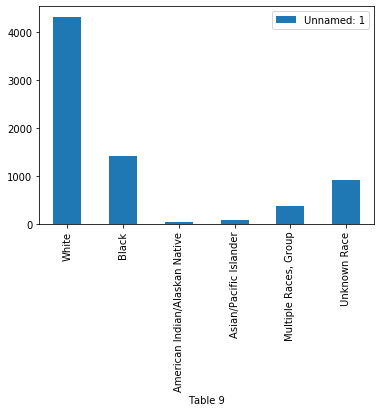

In [6]:
known_offender2004 = pd.read_excel('2004/Table9.xls')
known_offender2004 = known_offender2004.drop([0,8,9]).reset_index(drop=True)
known_offender2004['Table 9'][5] = known_offender2004['Table 9'][5][:-1]
known_offender2004.iloc[1:].set_index('Table 9').plot(kind='bar')

In [7]:
location2004 = pd.read_excel('2004/Table10.xls')
colsloc = ['Location', 'Total Incidents', 'Race', 'Religion', 'Sexual Orientation',
        'Ethnicity/National Origin', 'Disability','Multiple Bias Incidents']

In [8]:
location2004 = location2004.drop([0, 1, 2, 30]).reset_index(drop=True)

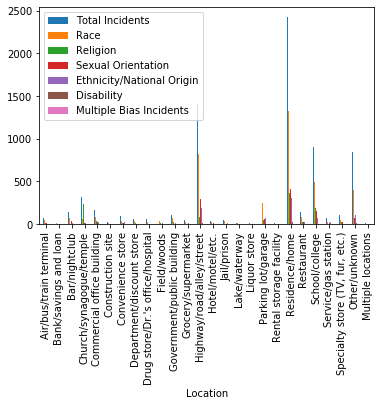

In [9]:
location2004.columns = colsloc
location2004.iloc[1:].set_index('Location').plot(kind='bar')

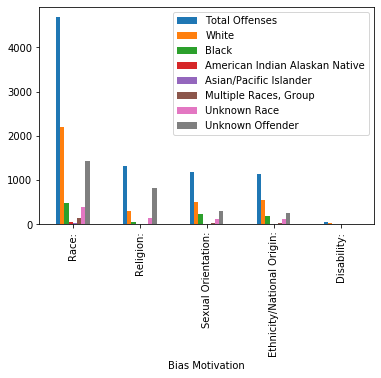

In [10]:
offender2005 = pd.read_excel('2005/Table5.xls')
offender2005 = offender2005.drop([0, 1, 2, 32])
offender2005.columns = colsoff
offender2005 = offender2005.reset_index(drop=True)
hold2005 = offender2005['Bias Motivation'][28][:-1]
offender2005['Bias Motivation'][28] = hold2005
offender2005.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


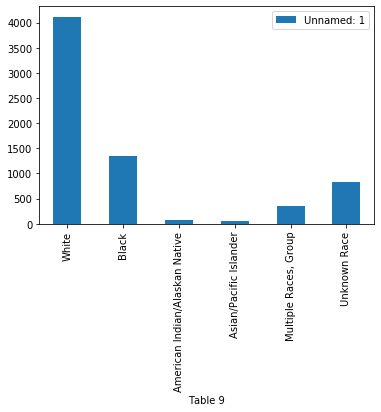

In [11]:
known_offender2005 = pd.read_excel('2005/Table9.xls')
known_offender2005 = known_offender2005.drop([0,8,9]).reset_index(drop=True)
known_offender2005['Table 9'][5] = known_offender2005['Table 9'][5][:-1]
known_offender2005.iloc[1:].set_index('Table 9').plot(kind='bar')

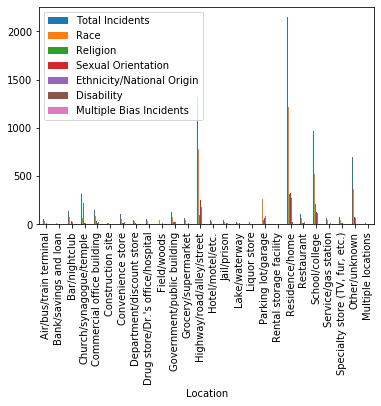

In [12]:
location2005 = pd.read_excel('2005/Table10.xls')
location2005 = location2005.drop([0, 1, 2, 30]).reset_index(drop=True)
location2005.columns = colsloc
location2005.iloc[1:].set_index('Location').plot(kind='bar')

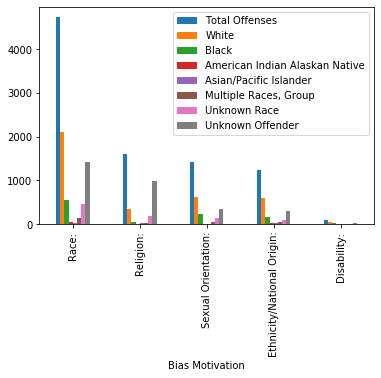

In [13]:
offender2006 = pd.read_excel('2006/Table5.xls')
offender2006 = offender2006.drop([0, 1, 2, 32])
offender2006.columns = colsoff
offender2006 = offender2006.reset_index(drop=True)
hold2006 = offender2006['Bias Motivation'][28][:-1]
offender2006['Bias Motivation'][28] = hold2006
offender2006.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


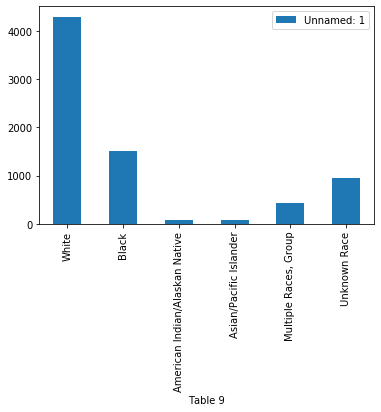

In [14]:
known_offender2006 = pd.read_excel('2006/Table9.xls')
known_offender2006 = known_offender2006.drop([0,8,9]).reset_index(drop=True)
known_offender2006['Table 9'][5] = known_offender2006['Table 9'][5][:-1]
known_offender2006.iloc[1:].set_index('Table 9').plot(kind='bar')

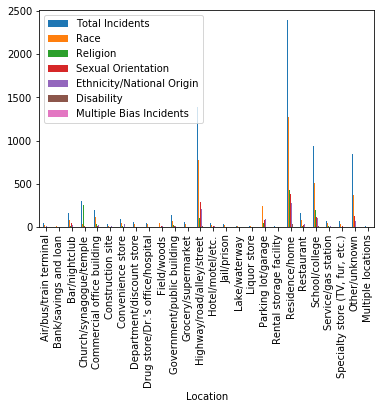

In [15]:
location2006 = pd.read_excel('2006/Table10.xls')
location2006 = location2006.drop([0, 1, 2, 30]).reset_index(drop=True)
location2006.columns = colsloc
location2006.iloc[1:].set_index('Location').plot(kind='bar')

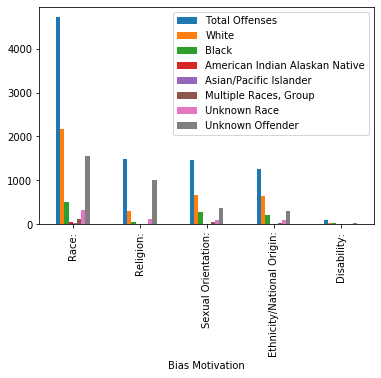

In [16]:
offender2007 = pd.read_excel('2007/Table5.xls')
offender2007 = offender2007.drop([0, 1, 2, 32])
offender2007.columns = colsoff
offender2007 = offender2007.reset_index(drop=True)
hold2007 = offender2007['Bias Motivation'][28][:-1]
offender2007['Bias Motivation'][28] = hold2007
offender2007.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


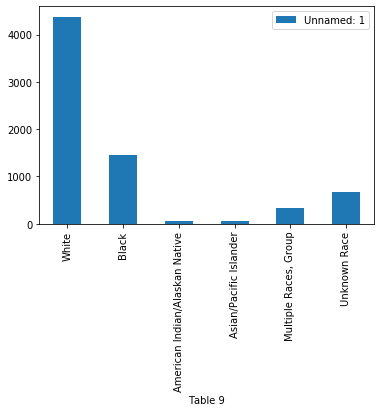

In [17]:
known_offender2007 = pd.read_excel('2007/Table9.xls')
known_offender2007 = known_offender2007.drop([0,8,9]).reset_index(drop=True)
known_offender2007['Table 9'][5] = known_offender2007['Table 9'][5][:-1]
known_offender2007.iloc[1:].set_index('Table 9').plot(kind='bar')

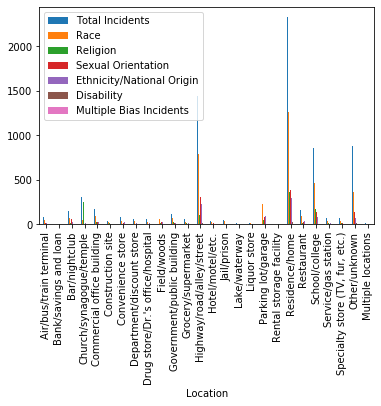

In [18]:
location2007 = pd.read_excel('2007/Table10.xls')
location2007 = location2007.drop([0, 1, 2, 30]).reset_index(drop=True)
location2007.columns = colsloc
location2007.iloc[1:].set_index('Location').plot(kind='bar')

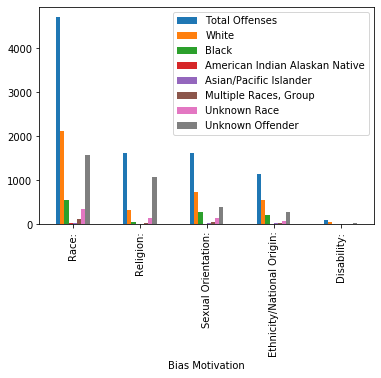

In [19]:
offender2008 = pd.read_excel('2008/Table5.xls')
offender2008 = offender2008.drop([0, 1, 2, 32])
offender2008.columns = colsoff
offender2008 = offender2008.reset_index(drop=True)
hold2008 = offender2008['Bias Motivation'][28][:-1]
offender2008['Bias Motivation'][28] = hold2008
offender2008.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


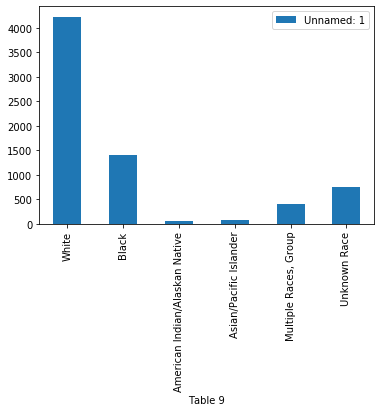

In [20]:
known_offender2008 = pd.read_excel('2008/Table9.xls')
known_offender2008 = known_offender2008.drop([0,8,9]).reset_index(drop=True)
known_offender2008['Table 9'][5] = known_offender2008['Table 9'][5][:-1]
known_offender2008.iloc[1:].set_index('Table 9').plot(kind='bar')

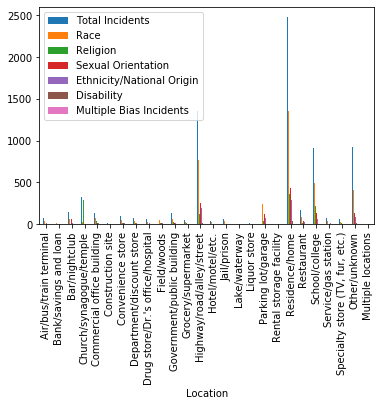

In [21]:
location2008 = pd.read_excel('2008/Table10.xls')
location2008 = location2008.drop([0, 1, 2, 30]).reset_index(drop=True)
location2008.columns = colsloc
location2008.iloc[1:].set_index('Location').plot(kind='bar')

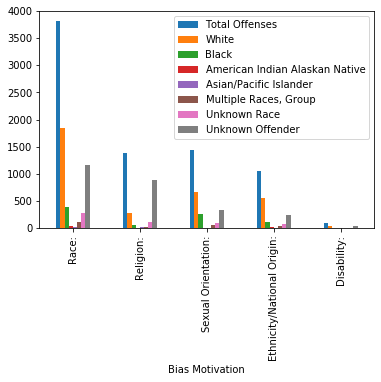

In [22]:
offender2009 = pd.read_excel('2009/Table 5.xls')
offender2009 = offender2009.drop([0, 1, 2, 32])
offender2009.columns = colsoff
offender2009 = offender2009.reset_index(drop=True)
hold2009 = offender2009['Bias Motivation'][28][:-1]
offender2009['Bias Motivation'][28] = hold2009
offender2009.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


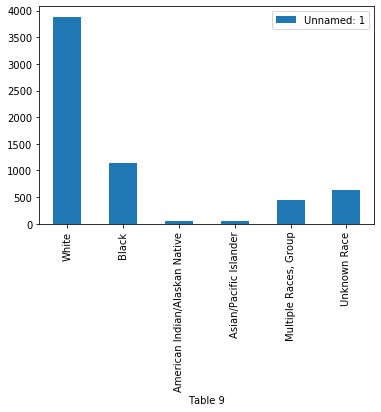

In [23]:
known_offender2009 = pd.read_excel('2009/Table 9.xls')
known_offender2009 = known_offender2009.drop([0,8,9]).reset_index(drop=True)
known_offender2009['Table 9'][5] = known_offender2009['Table 9'][5][:-1]
known_offender2009.iloc[1:].set_index('Table 9').plot(kind='bar')

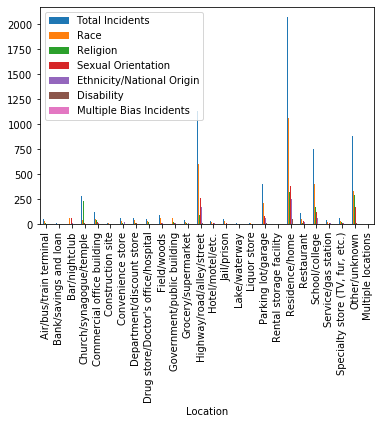

In [24]:
location2009 = pd.read_excel('2009/Table 10.xls')
location2009 = location2009.drop([0, 1, 2, 30]).reset_index(drop=True)
location2009.columns = colsloc
location2009.iloc[1:].set_index('Location').plot(kind='bar')

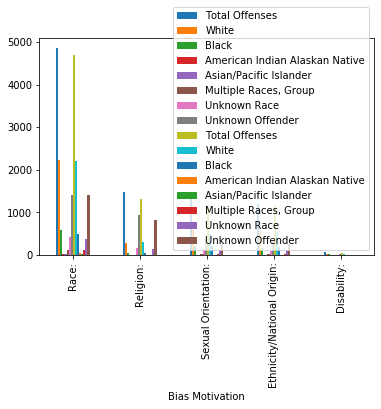

In [25]:
pd.concat([offender2004.iloc[[2,8,16,22,25]].set_index('Bias Motivation'), offender2005.iloc[[2,8,16,22,25]].set_index('Bias Motivation')], axis=1).plot(kind ='bar')

ValueError: cannot copy sequence with size 29 to array axis with dimension 9

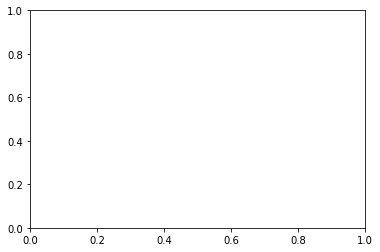

In [26]:
plt.plot([offender2004,offender2005])

In [ ]:
fig = plt.figure()

for frame in [offender2004, offender2005, offender2006, offender2007, offender2008, offender2009]:
    plt.plot(frame.iloc[[2,8,16,22,25]].set_index('Bias Motivation'), kind='bar')

plt.xlim(0,18000)
plt.ylim(0,30)
plt.show()